In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("/content/train.csv")

In [6]:
df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


İlk 5 veriyi inceleyerek dataset hakkında bilgi sahibi oldum. İlk yorumum şu oldu "Cabin" adlı sütunda sadece ilk 5 veri için bile 3 tane eksik değer olduğunu gördüm.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.info() komutu ile dataseti önizledim. Hangi sütunda kaç non-null değer var ve bunların veri tipleri neler onları gördüm. Cabin kısmı dikkatimi çekti çok fazla eksik veri var gibi gözüküyor.

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


df.isnull().sum() bloğunu çalıştırarak hangi sütunda kaç tane eksik data olduğunu öğrendim. Cabin sütununda 687 adet eksik veri olması o sütunun çok değersiz olduğunu, verilerimiz hakkında yorum yaparken fazla işe yaramayacağını gösterdi.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.describe() komutu ile her bir sütun için ortalama değerleri, minimum değerleri ve maksimum değerleri gördüm. Ortalama yaşın 29.6 olduğunu en küçük kişinin 0.42 yaşında olduğunu yani ~5 aylık olduğunu en büyük kişinin ise 80 yaşında olduğunu gördüm. Kurtulanların ortalaması 0.38 yani %38'i bu kazadan kurtulmuş.

<Axes: xlabel='Age', ylabel='Count'>

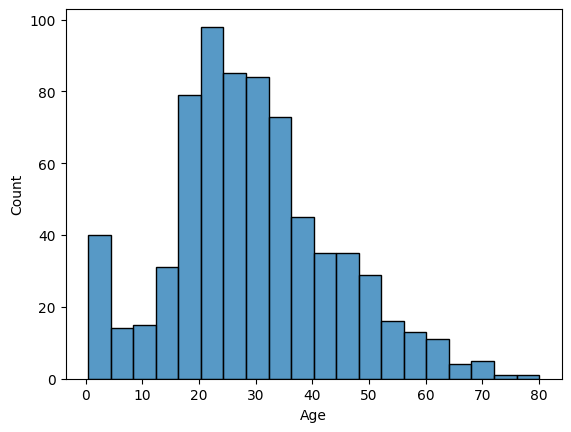

In [8]:
sns.histplot(df,x="Age")

Yaşın, sayıya göre dağılımı

<Axes: xlabel='Age', ylabel='Count'>

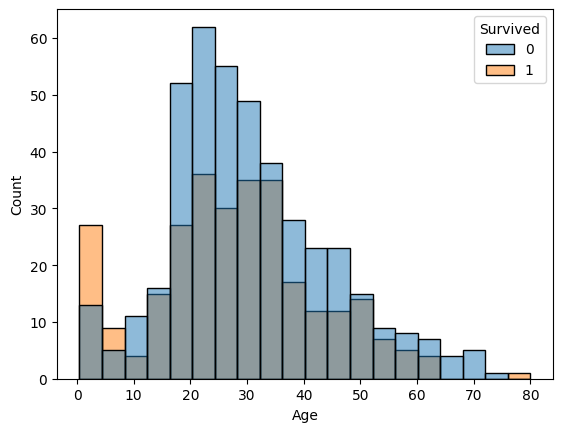

In [13]:
sns.histplot(df,x="Age",hue="Survived")

Yaşa göre hayatta kalanların, sayıya göre dağılımı. Turuncular hayatta kalanlar, maviler hayatını kaybedenler. 80 yaşındaki kişi hayatta kalmış.

<Axes: xlabel='Sex', ylabel='count'>

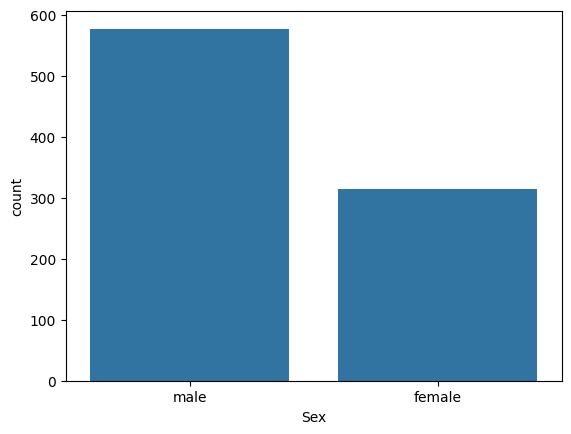

In [12]:
sns.countplot(df,x="Sex")

Kadın, erkek dağılımı

<Axes: xlabel='Sex', ylabel='count'>

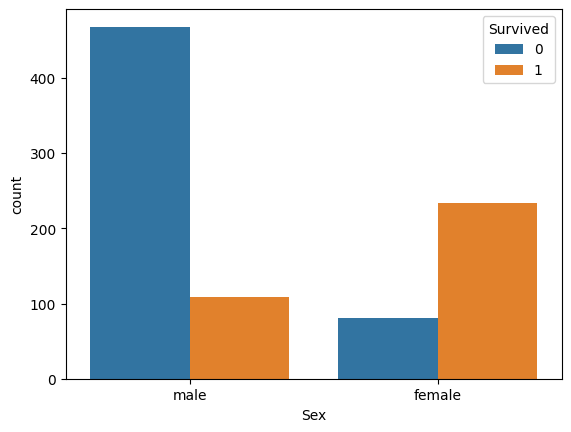

In [14]:
sns.countplot(df,x="Sex",hue="Survived")

Kadın ve erkeklerin, hayatta kalma ; hayatını kaybetme oranı.

Bütün bunları bulduk ve veriyi kendimiz yorumlayabildik. Şimdiki amacımız veri setini temizleyip bir model eğitmek. Bu eğiteceğimiz model sayesinde test.csv dosyası içerisindeki insanların yaşayıp yaşamadığını tahmin etmeye çalışacağız. Öncelikle işimize yaramaycak olan ve nan variable'ı yüksek olan columns'ları datasetinden çıkaracağız. Yani PassengerId, Name, Cabin, Ticket sütunları temizlenir.

In [18]:
df = df.drop(columns=["PassengerId","Name","Cabin","Ticket"])

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


df = df.drop(columns=["PassengerId","Name","Cabin","Ticket"]) bu komutla birlikte o sütunları temizledik. Kontrol ettikten sonra sütunların temizlendiğini doğruladım. Şimdi "Age" sütunundaki eksik veriden gözüme çarpan eksik verileri tamamlamayı düşünüyorum. Şu anda sadece "Age" ve "Embarked" sütunlarında eksik var. "Age" sütunu için sayıların ortalamasını alıp eksik değerlere atamak aklımdan geçiyor. Bu sayede tarafsız bir şekilde sonucu etkilememiş oluruz. "Embarked" sütunu için ise en çok tekrar eden değeri bulup eksik değerleri ona atamak aklımdan geçiyor.

In [24]:
df["Age"].mean()

np.float64(29.69911764705882)

Görüldüğü gibi Age sütunun ortalması 29.69 bunu zaten başlangıçta da görmüştük. Şimdi bu değeri nan variables için atayacağım.

In [25]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [26]:
df["Age"].isnull().sum()

np.int64(0)

df["Age"] = df["Age"].fillna(df["Age"].mean()) bu komutla birlikte Age sütunundaki bütün verileri düzelttik. df["Age"].isnull().sum() bu komutla da eksik kaldı mı diye kontrol ettiğimizde bir eksik kalmadığını görüyoruz. Sıra embarked sütununda orada da en çok tekrar eden değeri bulmamız lazım önce.

In [30]:
df["Embarked"].mode()

,Embarked
0,S


In [29]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [31]:
df["Embarked"].isnull().sum()

np.int64(0)

Embarked sütununda da boş değer kalmadı orayı da temizledik. Ancak burada bir işimiz daha var. Eğiteceğimiz model sayı okuyabilir sadece ancak bizim kolonda sayısal değerler yok. Bu sözel verileri sayısal verilere dönüştürmemiz gerekiyor. Burada "Sex" sütunundaki gibi yapamam çünkü 0,1,2 diye gidecek veriler bilgisayar 2 değerini 1 değerinden daha önemli kabul edecektir. O yüzden burada farklı bir yaklaşım uygulanır.

In [35]:
df = pd.get_dummies(df,"Embarked")

In [36]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,1,38.000000,1,0,71.2833,True,False,False
2,1,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,1,29.699118,1,2,23.4500,False,False,True
889,1,1,0,26.000000,0,0,30.0000,True,False,False


In [39]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


Görüldüğü gibi embarked sütunu da hazır. Sıra "Sex" sütununda

In [22]:
mapping = {"male":0,"female":1}
df["Sex"]= df["Sex"].map(mapping)

In [38]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,1,38.000000,1,0,71.2833,True,False,False
2,1,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,1,29.699118,1,2,23.4500,False,False,True
889,1,1,0,26.000000,0,0,30.0000,True,False,False


map fonksiyonu sayesinde male değişkenleri = 0, female ise = 1 olarak atandı. Veri seti tam anlamıyla eğitime hazı artık. Hiç eksik veri yok ve verilerin hepsi bilgisayar tarafından okunabilir halde.

In [40]:
from sklearn.model_selection import train_test_split

train.csv içindeki verileri eğitmeden önce verileri kendi arasında test verisi ve train verisi olarak eğiteceğiz. Bunun için bu modül eklenir. Şimdi sırada x ve y aksislerini belirlemede. y aksisi hayatta kalanlar yani "Survived" olurken. X aksisi y dışındakiler olacaktır.

In [41]:
y = df["Survived"]

In [42]:
X = df.drop(columns=["Survived"])

In [43]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [45]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,False
2,3,1,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,False,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,3,1,29.699118,1,2,23.4500,False,False,True
889,1,0,26.000000,0,0,30.0000,True,False,False


X ve y aksislerini belirledik şimdi sırada test verileri ve train verilerini belirlemede

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Burada x ve y değerlerini train ve test olarak ayrıdık. Aynı kitapta bahsedildiği gibi train için yüzde 80 test için yüzde 20 ayrım yaptık. Random state ise seçimlerin rastgeleliğini simgeliyor. Sürekli olarak aynı değerin gelmesini engelliyor ve bu sayede test ile train verileri rastgele bir biçimde dağılıyor.

In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

Burada modeli ekledik ve modeli eğittik. max iter = 4000 olmasının nedeni şu regresyon modeli eğitilirken en iyi vereceği cevabı bulabilmek için her seferinde hiperparametre ayarlarını günceller. normalde max iter sabit olarak 100 dür ancak 100 ile çalıştığında der ki en verimli cevap bu değil iterasyon sayısını yükselt ki en iyi cevabu vereyim sana der. Bizde 4000 yaparız ve modelin başarısını yüzde 81 olarak ölçeriz.

In [53]:
model.score(X_test,y_test)

0.8100558659217877

Modeli başarıyla eğittik ve yüzde 81 sonucunu aldık. Buraya kadar olan kısım süperdi. Peki test.csv'ye göre ne kadar başarılıyız onu da inceleyelim. Bunun için test.csv dosyasını yükleyeceğiz oranın verilerini de birebir burada temizlediğimiz gibi temizleyeceğiz.

In [55]:
test_df = pd.read_csv("/content/test.csv")

In [56]:
test_df[0:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Burada ilk defa karşımıza çıkan bir durum var. Fare değişkeninde 1 eksik var cabin yine silinecek yarısından çoğu yok verilerin. Ayrıca embarked ise tam. Age değişkeni tamamlanırken asıl datasetin ortalama verileriyle doldurulur. Ona dikkat edeceğiz.

In [60]:
test_df["Age"] = test_df["Age"].fillna(df["Age"].mean())

In [61]:
test_df["Age"].isnull().sum()

np.int64(0)

In [62]:
test_df = test_df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [63]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,29.699118,0,0,8.0500,S


In [65]:
mapping = {"male":0,"female":1}
test_df["Sex"] = test_df["Sex"].map(mapping)

In [66]:
test_df["Sex"]

,Sex
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [67]:
test_df = pd.get_dummies(test_df,"Embarked")

In [68]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.500000,0,0,7.8292,False,True,False
1,3,1,47.000000,1,0,7.0000,False,False,True
2,2,0,62.000000,0,0,9.6875,False,True,False
3,3,0,27.000000,0,0,8.6625,False,False,True
4,3,1,22.000000,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,0,29.699118,0,0,8.0500,False,False,True
414,1,1,39.000000,0,0,108.9000,True,False,False
415,3,0,38.500000,0,0,7.2500,False,False,True
416,3,0,29.699118,0,0,8.0500,False,False,True


In [71]:
test_df["Fare"] = test_df["Fare"].fillna(df["Fare"].median())

Yine dikkat edelim burada test_df["Fare"] doldurulurken eğitim datasetindeki bilgiler alındı.

In [72]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [73]:
test_tahminleri = model.predict(test_df)

Elimizdeki test verisini tahmine soktuk ve bir değer aldık. Bu değer her bir kişi için yaşayıp yaşamadığını bize söylüyor. Bunu anlamlı hale getirmek için PassengerId ve Survived adında iki kolona dönüştürmemiz gerekiyor.

In [74]:
test_tahminleri

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
original_test_df = pd.read_csv("/content/test.csv")
passenger_ids = original_test_df['PassengerId']

PassengerId değerini sildiğimiz için tekrardan yükledim ve kaydettim.

In [78]:
data = {"PassengerId": passenger_ids, "Survived": test_tahminleri}

data değişkeninde kütüphane olarak depoladım

In [81]:
submission_df = pd.DataFrame(data)

daha sonra pandas'a göre düzenledim ve elimizde .csv formatına geçmeye hazır bir data oldu.

In [82]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
submission_df.to_csv('submission.csv', index=False)

subimssion.csv dosyası oluşturuldu. Kaggle'da denendiğinde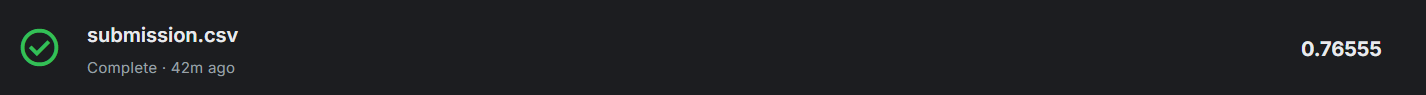
0.7655 yani %76.55 doğrulukla tahmin yaptı model.